# Convertir PDF en imagen

In [2]:
# import module
from pdf2image import convert_from_path
images = convert_from_path(
  "./inputs/114319C.PDF", 
  500, 
  poppler_path=r'C:\Program Files\poppler-23.01.0\Library\bin')
 
# Store Pdf with convert_from_path function
images = convert_from_path('./inputs/114319C.PDF')
 
 
for i in range(len(images)):
   
      # Save pages as images in the pdf
    images[i].save('114319C'+ str(i) +'.png', 'PNG')

In [8]:
# import module
from pdf2image import convert_from_path
images = convert_from_path(
  "./inputs/114319C.PDF", 
  500, 
  poppler_path=r'C:\Program Files\poppler-23.01.0\Library\bin')
 
# Store Pdf with convert_from_path function
images = convert_from_path('./inputs/114319A.PDF')
 
 
for i in range(len(images)):
   
      # Save pages as images in the pdf
    images[i].save('114319A'+ str(i) +'.png', 'PNG')

# Detección de orientación de texto en imágenes

In [9]:
import pytesseract as tess
from PIL import Image

my_image = Image.open('./114319A0.png')
# txt = tess.image_to_string(my_image)
#print(txt)

osd = tess.image_to_osd(my_image)

print(type(osd))
print(osd)

<class 'str'>
Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.78
Script: Latin
Script confidence: 0.78



In [7]:
import pytesseract as tess
from PIL import Image

my_image = Image.open('./114319C0.png')
# txt = tess.image_to_string(my_image)
#print(txt)

osd = tess.image_to_osd(my_image)

print(type(osd))
print(osd)


<class 'str'>
Page number: 0
Orientation in degrees: 270
Rotate: 90
Orientation confidence: 2.22
Script: Japanese
Script confidence: 0.02



In [25]:
import pytesseract as tess
from PIL import Image

my_image = Image.open('./inputs/114319A-scanned-rotated.png')
txt = tess.image_to_string(my_image)
#print(txt)

print(tess.image_to_osd(my_image))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.00
Script: Cyrillic
Script confidence: 1.17



In [24]:
import pytesseract as tess
from PIL import Image

my_image = Image.open('./inputs/114319A-scanned.png')
txt = tess.image_to_string(my_image)
#print(txt)

print(tess.image_to_osd(my_image))

Page number: 0
Orientation in degrees: 270
Rotate: 90
Orientation confidence: 0.43
Script: Greek
Script confidence: 0.95



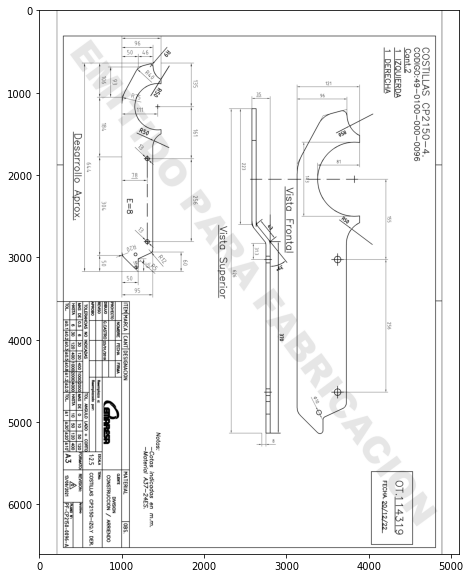

Ángulo promedio:  61.05039353547623
El texto es vertical


In [21]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
# pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

# Cargar imagen
img = cv2.imread("./inputs/114319A-scanned.png")

# Convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar filtro Canny
edges = cv2.Canny(gray, 50, 150, apertureSize = 3)

# Detectar líneas
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

angle_threshold = 15
angle_sum = 0
angle_count = 0

# Calcular el ángulo de inclinación de las líneas
for line in lines:
    for rho, theta in line:
        angle = np.rad2deg(theta)
        if angle > 180:
            angle -= 180
        angle_sum += angle
        angle_count += 1

# set size for imshow
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

# Calcular el ángulo promedio
avg_angle = angle_sum / angle_count
print("Ángulo promedio: ", avg_angle)

#Reconocimiento de texto
# text = pytesseract.image_to_string(img, lang = 'spa')

if avg_angle < angle_threshold or avg_angle > 180-angle_threshold:
    print("El texto es horizontal")
else:
    print("El texto es vertical")

In [5]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def get_orientation(file_path):
    rsrcmgr = PDFResourceManager()
    sio = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, sio, codec=codec, laparams=laparams)
    interpreter = PDFPageInterpreter(rsrcmgr, device)

    with open(file_path, 'rb') as fp:
        for page in PDFPage.get_pages(fp):
            interpreter.process_page(page)
            layout = device.get_result()
            width, height = layout.width, layout.height
            if width > height:
                return 'horizontal'
            else:
                return 'vertical'
    return 'undefined'

file_path = './inputs/114319A.PDF'
orientation = get_orientation(file_path)
print(orientation)

AttributeError: 'TextConverter' object has no attribute 'get_result'

In [3]:
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdftypes import resolve1

# Abrir el archivo PDF
fp = open('./inputs/114319A.PDF', 'rb')
parser = PDFParser(fp)
doc = PDFDocument(parser)

# Obtener la orientación del texto
orientation = resolve1(doc.catalog)
#orientation = resolve1(doc.catalog['ViewerPreferences'])['Direction']

# Mostrar la orientación del texto
print(orientation)

# Cerrar el archivo PDF
fp.close()

{'AcroForm': <PDFObjRef:57>, 'Metadata': <PDFObjRef:23>, 'OpenAction': [<PDFObjRef:4>, /'XYZ', None, None, None], 'PageLayout': /'SinglePage', 'PageMode': /'UseNone', 'Pages': <PDFObjRef:3>, 'Type': /'Catalog'}


# Insert rectangle shape and text

In [ ]:
import fitz

doc = fitz.open("./inputs/114319B_rotated.PDF")

for page in doc:
    print(page.rect.width, page.rect.height)
    page_width = page.rect.width
    page_height = page.rect.height 
    
    if (page_width > page_height):
        page.set_rotation(45)
        
    page.draw_rect(
        [445,670,505,775],
        # [510,670,570,775],  
        color = (0,0,0), 
        width = 0.5,
        overlay = True)
    
    page.insert_text(
        [480,675],
        "OT.114319",
        fontsize = 14,
        color = (0,0,0), 
        fontname = "Helvetica",
        rotate = -90,
        overlay = True
    )
    
    page.insert_text(
        [460,675],
        "FECHA: 20/12/22",
        fontsize = 9,
        color = (0,0,0), 
        fontname = "Helvetica-Bold",
        rotate = -90,
        border_width=2,
        overlay = True 
    )
    
    # insert_text(
    #     point, 
    #     text, 
    #     fontsize=11, 
    #     fontname='helv', 
    #     fontfile=None, 
    #     idx=0, 
    #     color=None, 
    #     fill=None, 
    #     render_mode=0, 
    #     border_width=1, 
    #     encoding=TEXT_ENCODING_LATIN, 
    #     rotate=0, 
    #     morph=None, 
    #     stroke_opacity=1, 
    #     fill_opacity=1, 
    #     overlay=True, 
    #     oc=0)



doc.save('output_018.pdf')

In [ ]:
import typing
from borb.pdf import Document
from borb.pdf import PDF

import typing
from decimal import Decimal

from borb.pdf import Document
from borb.pdf import Page
from borb.pdf import PDF
from borb.pdf import MultiColumnLayout
from borb.pdf import PageLayout
from borb.pdf import Paragraph
from borb.pdf import HexColor


def main():

    doc: typing.Optional[Document] = None
    with open("./inputs/114319C.PDF", "rb") as pdf_file_handle:
        doc = PDF.loads(pdf_file_handle)

    assert doc is not None

    # rotate Page
    doc.get_page(0).rotate_right()

    # store Document
    with open("output_004.pdf", "wb") as pdf_file_handle:
        PDF.dumps(pdf_file_handle, doc)


if __name__ == "__main__":
    main()

In [ ]:

from borb.pdf import Document
from borb.pdf import Page
from borb.pdf import PDF
from borb.pdf import MultiColumnLayout
from borb.pdf import PageLayout
from borb.pdf import Paragraph
from borb.pdf import HexColor

from pathlib import Path
from borb.pdf import Document
from borb.pdf import Page
from borb.pdf import Paragraph
from borb.pdf import PDF
from borb.pdf.canvas.geometry.rectangle import Rectangle
from borb.pdf import Alignment
from borb.pdf.canvas.layout.annotation.square_annotation import SquareAnnotation
from borb.pdf import HexColor, Image

from decimal import Decimal


def main():

    doc: typing.Optional[Document] = None
    with open("./inputs/114319B.PDF", "rb") as pdf_file_handle:
        doc = PDF.loads(pdf_file_handle)

    assert doc is not None

    # doc.get_page(0).rotate_right()
    
    # get first page
    page: Page = doc.get_page(0)
    
    # layout = SingleColumnLayout(page)
    
    # layout.add(
    #     Image(
    #         Path("./inputs/114319A-scanned-rotated.png"),
    #         width=Decimal(450),
    #         height=Decimal(450),
    #     )
    # )
    
    # get all data from page
    page_data = page.get_document
    
    r: Rectangle = Rectangle(
        Decimal(450),                # x: 0 + page_margin
        Decimal(500),    # y: page_height - page_margin - height_of_textbox
        Decimal(100),      # width: page_width - 2 * page_margin
        Decimal(50),               # height
    )

    page.add_annotation(SquareAnnotation(r, stroke_color=HexColor("#ff0000")))

    # the next line of code uses absolute positioning
    Paragraph("\t\tOT.999999\n\t\tFECHA: 20/12/22", 
              vertical_alignment=Alignment.MIDDLE
              ).paint(page, r)

    # store Document
    with open("output_003.pdf", "wb") as pdf_file_handle:
        PDF.dumps(pdf_file_handle, doc)


if __name__ == "__main__":
    main()

In [ ]:
import typing
from borb.pdf import Document
from borb.pdf import PDF
from borb.toolkit.ocr.ocr_as_optional_content_group import OCRAsOptionalContentGroup

from pathlib import Path


def main():

    # set up everything for OCR
    tesseract_data_dir: Path = Path("./inputs/")
    assert tesseract_data_dir.exists()
    l: OCRAsOptionalContentGroup = OCRAsOptionalContentGroup(tesseract_data_dir)

    # read Document
    doc: typing.Optional[Document] = None
    with open("./inputs/114319B.PDF", "rb") as pdf_file_handle:
        doc = PDF.loads(pdf_file_handle, [l])

    assert doc is not None

    with open("output_002.pdf", "wb") as pdf_file_handle:
        PDF.dumps(pdf_file_handle, doc)


if __name__ == "__main__":
    main()

In [ ]:
import cv2

image = cv2.imread('./inputs/114319A-scanned-rotated.png')
image.shape

In [ ]:
from pathlib import Path
from borb.pdf import Document
from borb.pdf import Page
from borb.pdf import Paragraph
from borb.pdf import PDF
from borb.pdf.canvas.geometry.rectangle import Rectangle
from borb.pdf import Alignment
from borb.pdf.canvas.layout.annotation.square_annotation import SquareAnnotation
from borb.pdf import HexColor, Image

from decimal import Decimal


def main():
    doc: Document = Document()

    page: Page = Page()
    doc.add_page(page)
    
    doc.get_page(0).rotate_right()
    
    layout = SingleColumnLayout(page)
    
    layout.add(
        Image(
            Path("./inputs/114319A-scanned-rotated.png"),
            width=Decimal(450),
            height=Decimal(450),
        )
    )
    
    r: Rectangle = Rectangle(
        Decimal(450),                # x: 0 + page_margin
        Decimal(500),    # y: page_height - page_margin - height_of_textbox
        Decimal(100),      # width: page_width - 2 * page_margin
        Decimal(50),               # height
    )

    page.add_annotation(SquareAnnotation(r, stroke_color=HexColor("#ff0000")))

    # the next line of code uses absolute positioning
    Paragraph("\t\tOT.999999\n\t\tFECHA: 20/12/22", 
              vertical_alignment=Alignment.MIDDLE
              ).paint(page, r)

    # store
    with open("output3.pdf", "wb") as pdf_file_handle:
        PDF.dumps(pdf_file_handle, doc)


if __name__ == "__main__":
    main()

In [ ]:
from pathlib import Path

from borb.pdf import Document
from borb.pdf import Page
from borb.pdf import SingleColumnLayout
from borb.pdf import Paragraph
from borb.pdf import PDF

# create an empty Document
pdf = Document()

# add an empty Page
page = Page()
pdf.add_page(page)

# use a PageLayout (SingleColumnLayout in this case)
layout = SingleColumnLayout(page)

# add a Paragraph object
layout.add(Paragraph("Hello World!"))


layout.add(
        Image(
            "./inputs/114319A-scanned.png",
            width=Decimal(400),
            height=Decimal(400),
        )
    )

# save the Document using borb
with open("output.pdf", "wb") as pdf_file_handle:
        PDF.dumps(pdf_file_handle, pdf)



In [ ]:
edit_pdf(Path("./inputs/114319B.PDF"), Path("./output.PDF"))
    

In [ ]:
import fitz

output_file = "example-with-barcode.pdf"

# define the position (upper-right corner)
image_rectangle = fitz.Rect(450,20,550,120)

# retrieve the first page of the PDF
file_handle = fitz.open("./inputs/114319A.PDF")
first_page = file_handle[0]

# add the image
first_page.insertImage(image_rectangle, fileName="./inputs/text.png")

file_handle.save(output_file)

In [ ]:
# import module
from pdf2image import convert_from_path
 
 
# Store Pdf with convert_from_path function
images = convert_from_path('./inputs/114319C.PDF')
 
for i in range(len(images)):
   
      # Save pages as images in the pdf
    images[i].save('page'+ str(i) +'.jpg', 'JPEG')

In [ ]:
from PyPDF2 import PdfWriter

writer = PdfWriter()
writer.add_blank_page(width=200, height=200)

data = b"any bytes - typically read from a file"
writer.add_attachment("smile.png", data)

with open("PyPDF2-test3.pdf", "wb") as output_stream:
    writer.write(output_stream)

In [ ]:
from PyPDF2 import PdfReader, PdfWriter
from PyPDF2.generic import AnnotationBuilder

reader = PdfReader("./inputs/114319B.PDF")
page = reader.pages[0]
writer = PdfWriter()
writer.add_page(page)

annotation = AnnotationBuilder.rectangle(
    rect=(50, 550, 200, 650))

writer.add_annotation(page_number=0, annotation=annotation)

annotation_1 = AnnotationBuilder.free_text(
    "Hello World\nThis is the second line!",
    rect=(50, 550, 200, 650),
    font="Arial",
    bold=True,
    italic=True,
    font_size="20pt",
    font_color="000000",
    border_color="0000ff",
)
writer.add_annotation(page_number=0, annotation=annotation_1)


with open("PyPDF2-test2.pdf", "wb") as fp:
    writer.write(fp)

In [ ]:
from PyPDF2 import PdfReader, PdfWriter

reader = PdfReader("./inputs/114319B.PDF")
writer = PdfWriter()

page = reader.pages[0]
fields = reader.get_fields()

writer.add_page(page)

writer.update_page_form_field_values(
    writer.pages[0], {"fieldname": "some filled in text"}
)

# update text from a page
    

# write "output" to PyPDF2-output.pdf
with open("PyPDF2-test2.pdf", "wb") as output_stream:
    writer.write(output_stream)

In [ ]:
from reportlab.platypus import SimpleDocTemplate
from reportlab.platypus import Table

from reportlab.lib.units import inch
from reportlab.graphics import shapes

# setup your platypus document
pdf = SimpleDocTemplate("sample.pdf",
                        pagesize=letter,
                        rightMargin=72,
                        leftMargin=72,
                        topMargin=72,
                        bottomMargin=18)

# create your table from data
data = [
['a', 'b', 'c'],
['where I want to import rectangles', '', ''],
['some data', '', '']]

table = Table(data)

# draw your shapes and add to the platypus doc which is letter 8.5x11 inch
x = 1
y = 8   
width = (8.5-2)*inch # object in points, so we multiply by inch (72 points)
height = 1*inch # object in points, so we multiply by inch (72 points)

# Create your drawing with rectangle 
d = shapes.Drawing(width,height)
r = shapes.Rect(x, y, width, height, fillColor=None, strokeColor=colors.black)
# add the rectangle to your Drawing
d.add(r)

# Setup your Story
Story = []
Story.append(table)
# add the Drawing (i.e. the drawn rectangle) to the platypus doc
Story.append(d)

# Export to PDF
pdf.build(Story)

In [ ]:
import fitz
# Open the pdf
doc = fitz.open("./inputs/114319B.PDF")
for page in doc:
    # For every page, draw a rectangle on coordinates (1,1)(100,100)
    page.draw_rect(
        [300,300,400,400],  color = (0, 0, 0), width = 1)
    
    # insert text in the rectangle
    page.insert_textbox(
        [300,300,400,400], "Hello World", fontsize = 20, color = (0, 0, 0), fontname = "Helvetica",
        rotate = 90, align = 0, overlay = True, border = 0, fill = 0, fillcolor = (0, 0, 0), fillopacity = 0.5)
    
    # get page dimensions
    print(page.rect.width, page.rect.height)
    
    
# Save pdf
doc.save('output_007.pdf')

In [ ]:
import pdfrw
pdf = pdfrw.PdfReader("./inputs/114319B.PDF")

new_pdf = pdfrw.PdfWriter()
for page in pdf.pages:
    
    # gets all words from the page
    words = page.Contents.stream.split()
    print(words)
    
#     for annot in page.Annots or []:
#         print(annot)
    #     old_url = annot.A.URI
    #     if old_url.upper().__contains__("GOOGLE"):
    #         new_url = old_url.replace("google","test")
    #         annot.A.URI = new_url
    
    new_pdf.addPage(page)
new_pdf.write("pdfrw-test1.pdf")


In [ ]:
import typing
from borb.pdf import Document
from borb.pdf import PDF

import typing
from decimal import Decimal

from borb.pdf import Document
from borb.pdf import Page
from borb.pdf import PDF
from borb.pdf import MultiColumnLayout
from borb.pdf import PageLayout
from borb.pdf import Paragraph
from borb.pdf import HexColor


def main():

    # create new document
    d: Document = Document()

    # add Page
    p: Page = Page()
    d.add_page(p)
    page_number: int = 1

    # create PageLayout
    l: PageLayout = MultiColumnLayout(p)

    # adding Pages
    for _ in range(0, 20):
        if l.get_page() != p or page_number == 1:
            l.add(
                Paragraph(
                    "Page %d" % page_number,
                    font_color=HexColor("f1cd2e"),
                    font_size=Decimal(20),
                    font="Courier-Bold",
                )
            )
            p = l.get_page()
            page_number += 1

        l.add(
            Paragraph(
                """
                        Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. 
                        Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. 
                        Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. 
                        Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
                        """
            )
        )

    # write
    with open("output_005.pdf", "wb") as pdf_file_handle:
        PDF.dumps(pdf_file_handle, d)


if __name__ == "__main__":
    main()

In [ ]:
import os
from fpdf import FPDF
#from PIL import Image

#pdf = FPDF(orientation = 'L')
pdf = FPDF()
pdf.add_page() #add a page first

#i = Image.open('flower.png')
#i_name = os.path.basename('flower.png')
#w, h = i.size
pdf.image('flower.png')
pdf.output("image.pdf", "F")

dirs = os.listdir('.')

pdf1 = FPDF()
#pdf1.add_page()
for img in dirs:
    if os.path.isfile(img) and os.path.splitext(img)[1].lower() in ('.jpg', '.jpeg', '.png'):
        #print(img)
        pdf1.add_page()
        pdf1.image(img)

pdf1.output("images.pdf", "F")

In [ ]:
import aspose.words as aw

# Create a blank document.
doc = aw.Document("./inputs/114319A.PDF")

# Use a document builder to add content to the document.
builder = aw.DocumentBuilder(doc)
# Write a new paragraph in the document with the text "Hello World!".
builder.writeln("Hello, World!")

doc.save("aspose-test2.pdf")

In [ ]:
import aspose.words as aw

# Load the PDF document from the disc.
doc = aw.Document("./inputs/114319A.PDF")


doc.save("Output.pdf")

In [ ]:
import PyPDF2

# Abrir el archivo PDF
pdf_file = open('C:/Users/joel_/Desktop/emaresa/114319A.PDF', 'rb')

# Crear un objeto PDFReader
pdf_reader = PyPDF2.PdfReader(pdf_file)

# Buscar el elemento en cada página del archivo PDF
search_term = "OT.114319"
for page in pdf_reader.pages:
    page_text = page.extract_text()
    if search_term in page_text:
        print(f'Se encontró el elemento en la página {page + 1}')


# Cerrar el archivo PDF
pdf_file.close()

In [ ]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

print(convert_pdf_to_txt('ejemplo.pdf'))